In [5]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# For visualizations to display properly in Jupyter Notebook
%matplotlib inline



In [7]:
# Load the dataset
df = pd.read_csv(r"C:\Users\sumanth\Videos\content recommendation system for ott platforms\content recommendation system for ott platforms\code\MoviesOnStreamingPlatforms.csv", encoding="ISO-8859-1")

# Display the first few rows
print(df.head())

# Display dataset information
print(df.info())


   Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                   

In [8]:
# Check for missing values
print(df.isnull().sum())

# Fill missing IMDb ratings with the median
df['IMDb'].fillna(df['IMDb'].median(), inplace=True)

# Fill missing Age with 'Unknown'
df['Age'].fillna('Unknown', inplace=True)

# Drop rows where Genres are missing
df = df.dropna(subset=['Genres'])

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

# Verify the cleaned dataset
print(df.isnull().sum())


Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             614
Runtime              592
dtype: int64
Title                  0
Year                   0
Age                    0
IMDb                   0
Rotten Tomatoes    11316
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            480
Genres                 0
Country              185
Language             363
Runtime              353
dtype: int64


In [10]:
# Display dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16469 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16469 non-null  object 
 1   Year             16469 non-null  int64  
 2   Age              16469 non-null  object 
 3   IMDb             16469 non-null  float64
 4   Rotten Tomatoes  5153 non-null   object 
 5   Netflix          16469 non-null  int64  
 6   Hulu             16469 non-null  int64  
 7   Prime Video      16469 non-null  int64  
 8   Disney+          16469 non-null  int64  
 9   Type             16469 non-null  int64  
 10  Directors        15989 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16284 non-null  object 
 13  Language         16106 non-null  object 
 14  Runtime          16116 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 2.0+ MB
None


In [11]:
# Convert Rotten Tomatoes scores to numeric, removing the '%' symbol
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip('%').astype(float)

# Fill missing Rotten Tomatoes scores with the median
df['Rotten Tomatoes'].fillna(df['Rotten Tomatoes'].median(), inplace=True)


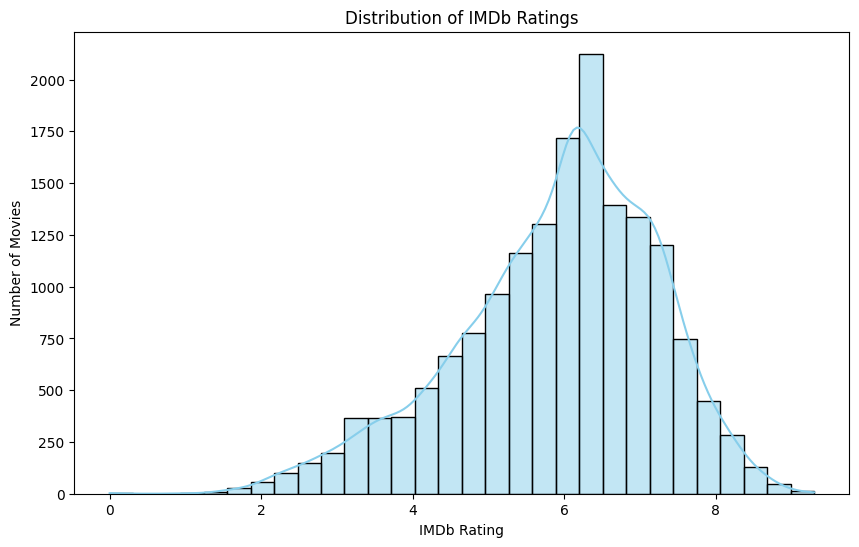

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDb'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.show()


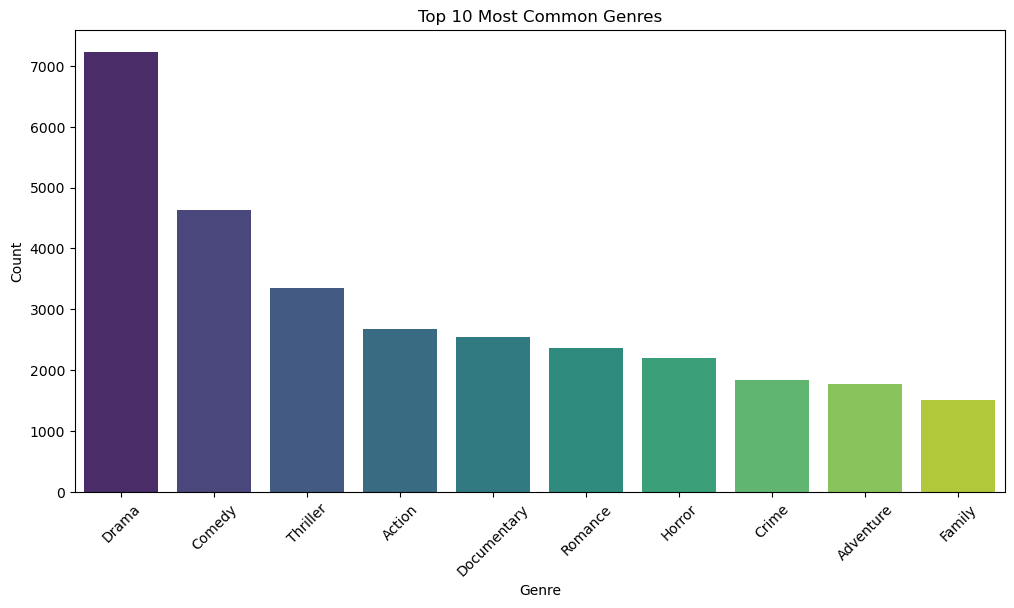

In [12]:
from collections import Counter

# Count genres
genres = df['Genres'].str.split(',')
all_genres = [genre.strip() for sublist in genres for genre in sublist]
genre_counts = Counter(all_genres)

# Plot the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=[genre for genre, _ in genre_counts.most_common(10)],
            y=[count for _, count in genre_counts.most_common(10)],
            palette='viridis')
plt.title("Top 10 Most Common Genres")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


In [13]:
# Replace NaN values in Genres with an empty string
df['Genres'] = df['Genres'].fillna('')

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Genres'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


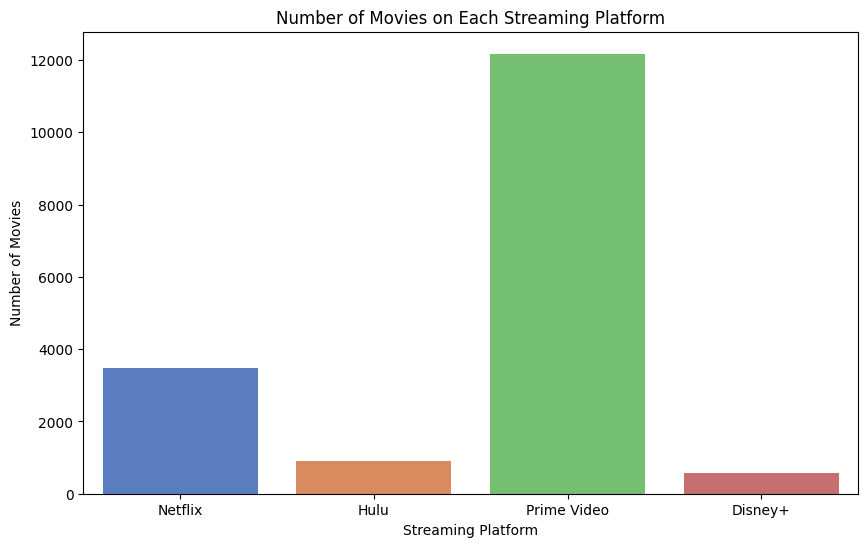

In [10]:
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platform_counts = df[platforms].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='muted')
plt.title("Number of Movies on Each Streaming Platform")
plt.xlabel("Streaming Platform")
plt.ylabel("Number of Movies")
plt.show()


In [19]:
# Replace NaN values in Genres with an empty string
df['Genres'] = df['Genres'].fillna('')

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Genres'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [20]:
# Function to get recommendations based on a movie title
def recommend_movies(title, cosine_sim=cosine_sim, df=df):
    # Get the index of the movie that matches the title
    indices = pd.Series(df.index, index=df['Title']).drop_duplicates()
    if title not in indices:
        print(f"'{title}' not found in the dataset.")
        return None
    
    idx = indices[title]
    
    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 recommended movies
    return df[['Title', 'Year', 'IMDb', 'Genres']].iloc[movie_indices]

# Example: Get recommendations for "Inception"
recommendations = recommend_movies("The Matrix")
print(recommendations)


                                   Title  Year  IMDb         Genres
83                   The Matrix Reloaded  2003   7.2  Action,Sci-Fi
251               The Matrix Revolutions  2003   6.8  Action,Sci-Fi
298   Terminator 3: Rise of the Machines  2003   6.3  Action,Sci-Fi
649                  Battle: Los Angeles  2011   5.7  Action,Sci-Fi
1473            Illang: The Wolf Brigade  2018   6.0  Action,Sci-Fi
1985                        Battle Drone  2018   5.2  Action,Sci-Fi
2761                       Alien Warfare  2019   2.6  Action,Sci-Fi
3888                   Universal Soldier  1992   6.0  Action,Sci-Fi
4278                          Kill Order  2017   4.1  Action,Sci-Fi
5089                      Super Inframan  1975   6.3  Action,Sci-Fi


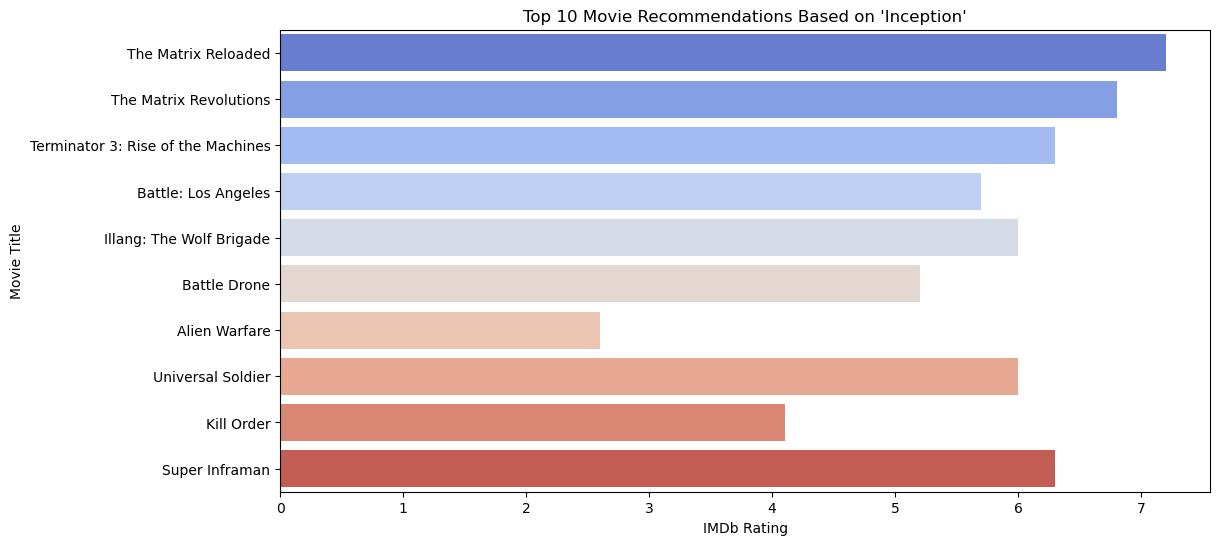

In [21]:
# Check if recommendations are available before plotting
if recommendations is not None:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='IMDb', y='Title', data=recommendations, palette='coolwarm')
    plt.title("Top 10 Movie Recommendations Based on 'Inception'")
    plt.xlabel("IMDb Rating")
    plt.ylabel("Movie Title")
    plt.show()
